### **Setup Environment, Compile C++ Codes, and Import Dependencies**

This assignment requires us to understand and apply traditional image processing techniques. Considering the efficiency of pixel traversal, I plan to use C++ as the main language and then package it into a Python package to provide an API for use in a Python notebook. I am using the third-party library pybind11 to package the C++ code. If the packaging doesn’t work, you can place the provided package in the modules folder; this package is simply a compilation of the C++ code under the scripts directory.

In [1]:
!python compile.py

running build_ext
copying build\lib.win-amd64-cpython-312\image_processing.cp312-win_amd64.pyd -> 
Removed existing file: modules\image_processing.cp312-win_amd64.pyd
Moved image_processing.cp312-win_amd64.pyd to modules

Success!


In [2]:
from modules import *

### **Image Processing**

Before proceeding with image processing, I encapsulated an `Image` class to store information about the image, including its height, width, bytes per pixel, raw data, and so on. I then specified that the methods for image processing must be static and return a new image to ensure that the original image information remains unchanged. This principle will always apply: the image's data is read-only and cannot be modified.

For detailed API information, please refer to the `README.md` file.

---

#### **[Problem 1: Edge Detection]**

- **Basic Edge Detection Algorithms**

    Often, when we look at an image, we want to find its edges to capture information. Here, I have implemented two different methods for edge detection:

    - *Sobel Edge Detection*:
    This method uses the Sobel operator to compute the first-order partial derivatives, and then applies a threshold to detect the edges. For different choices, you can choose to use Sobel Kernel with size 3 or 5. (See details in `Kernel.cpp`)

    - *Laplacian Edge Detection*:
    This method uses the Laplacian operator to compute the second-order derivatives and find the zero-crossings as edges. It also introduces noise to oscillate the edges, which helps in widening them.

    The results are as follows. After several adjustments to the threshold and noise parameters, I think the final outcome looks pretty good.


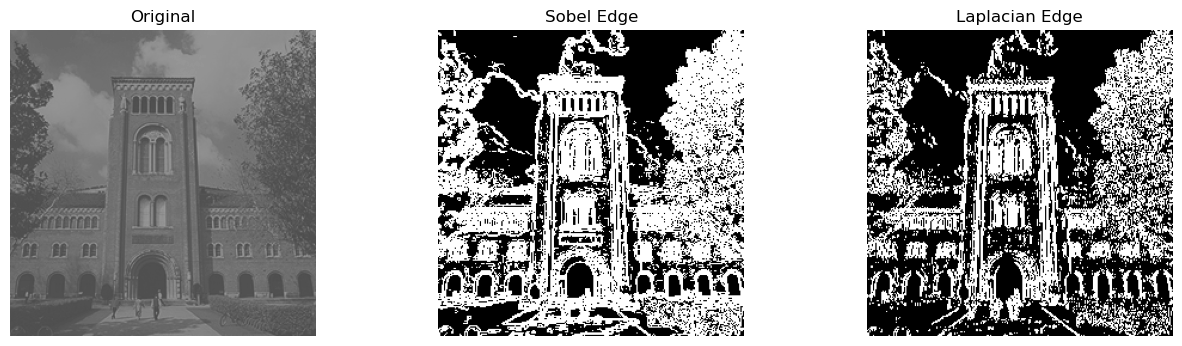

In [3]:
# Basic edge detection algorithms
building_img = Image(256, 256, 1)
building_img.load("images/HW2/building.raw")

building_sobel_edge = Image.sobel_edge(building_img, 0, 3, "none", "auto")
building_laplacian_edge = Image.laplacian_edge(building_img, 1, 3, 20)

show_images([building_img, building_sobel_edge, building_laplacian_edge], ["Original", "Sobel Edge", "Laplacian Edge"])

- **Advanced Edge Detection Algorithms**

    Before performing edge detection, we usually carry out some simple preprocessing to improve the image's readability. For this, I used **Histogram Equalization** and **Denoise** methods for preprocessing, followed by **Sobel Edge Detection**. Afterward, I did two things:
    
    1. **Manual Parameter Adjustment**: I manually adjusted the parameters to achieve the best possible result. For details, please refer to **Manual Thresholding**.
    2. **Post-Processing**: I added post-processing and used two methods:
        - **Non-Maximum Suppression**: This method narrows down the edges by removing non-maximum values along the gradient direction, making the edge more defined.
        - **Hysteresis Thresholding**: This method classifies all pixels into three categories: strong edges, weak edges, and intermediate edges. The effects are as follows:
            - If the pixel is a strong edge, it is considered an edge;
            - If the pixel is a weak edge, it is not considered an edge;
            - If the pixel is an intermediate edge, it is considered an edge if it is connected to a strong edge.

    Through proper parameter adjustments, I obtained a satisfactory result. The details can be seen in the images below.


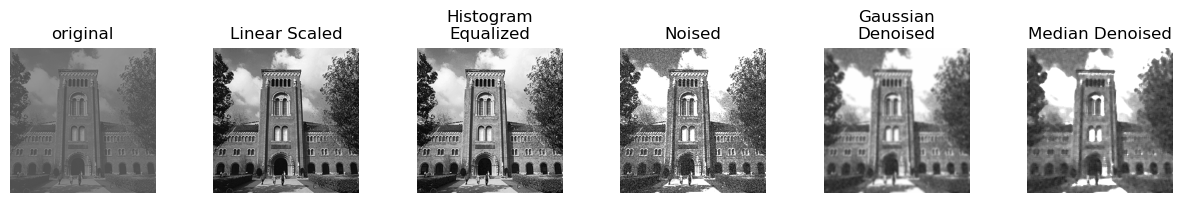

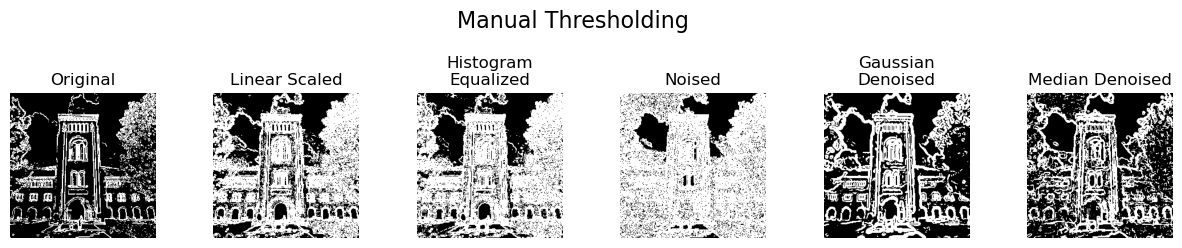

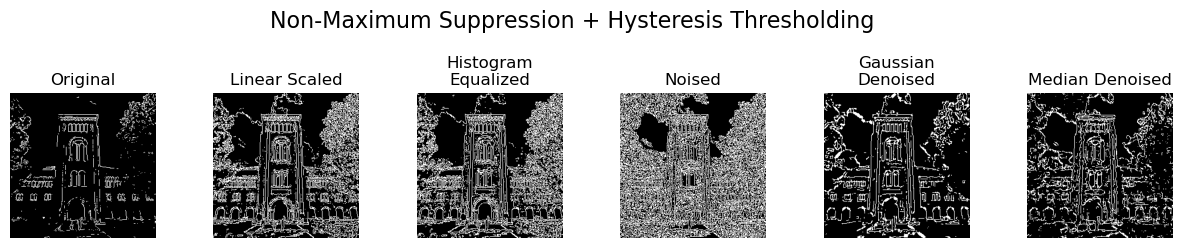

In [4]:
# Advanced edge detection algorithms
building_noise = Image(256, 256, 1)
building_noise.load("images/HW2/building_noise.raw")

## Pre-processing Techniques
building_img_Linear_scaled = Image.linear_scale(building_img, 0, 0, 255)
building_img_Hist_Equalized = Image.hist_equalize(building_img, 0, 64)

building_noise_gaussian = Image.gaussian_denoise(building_noise, 0, 11, 1.5)
building_noise_median = Image.median_denoise(building_noise, 0, 5)

show_images([building_img, building_img_Linear_scaled, building_img_Hist_Equalized, building_noise, building_noise_gaussian, building_noise_median], ["original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"])

## Post-processing Techniques
building_sobel_edge_non_maximum = Image.sobel_edge(building_img, 0, 3, "none", "manual", { "threshold": 60 })
building_linear_sobel_edge_non_maximum = Image.sobel_edge(building_img_Linear_scaled, 0, 3, "none", "manual", { "threshold": 60 })
building_hist_sobel_edge_non_maximum = Image.sobel_edge(building_img_Hist_Equalized, 0, 3, "none", "manual", { "threshold": 60 })

building_noise_sobel_edge_non_maximum = Image.sobel_edge(building_noise, 0, 3, "none", "manual", { "threshold": 60 })
building_gaussian_sobel_edge_non_maximum = Image.sobel_edge(building_noise_gaussian, 0, 3, "none", "manual", { "threshold": 60 })
building_median_sobel_edge_non_maximum = Image.sobel_edge(building_noise_median, 0, 3, "none", "manual", { "threshold": 60 })

show_images([building_sobel_edge_non_maximum, building_linear_sobel_edge_non_maximum, building_hist_sobel_edge_non_maximum, building_noise_sobel_edge_non_maximum, building_gaussian_sobel_edge_non_maximum, building_median_sobel_edge_non_maximum], ["Original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"], "Manual Thresholding")

building_sobel_edge_non_maximum = Image.sobel_edge(building_img, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })
building_linear_sobel_edge_non_maximum = Image.sobel_edge(building_img_Linear_scaled, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })
building_hist_sobel_edge_non_maximum = Image.sobel_edge(building_img_Hist_Equalized, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 120, "high_threshold": 200 })

building_noise_sobel_edge_non_maximum = Image.sobel_edge(building_noise, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })
building_gaussian_sobel_edge_non_maximum = Image.sobel_edge(building_noise_gaussian, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })
building_median_sobel_edge_non_maximum = Image.sobel_edge(building_noise_median, 0, 3, "non-maximum", "hysteresis", { "low_threshold": 80, "high_threshold": 120 })

show_images([building_sobel_edge_non_maximum, building_linear_sobel_edge_non_maximum, building_hist_sobel_edge_non_maximum, building_noise_sobel_edge_non_maximum, building_gaussian_sobel_edge_non_maximum, building_median_sobel_edge_non_maximum], ["Original", "Linear Scaled", "Histogram Equalized", "Noised", "Gaussian Denoised", "Median Denoised"], "Non-Maximum Suppression + Hysteresis Thresholding")

#### **[Problem 2: Morphological Processing]**

For some binary images that are purely black or white, special processing is sometimes necessary. For instance, in Electrical and Computer Engineering (ECE), we may have simplified circuit boards. If we need to quickly identify where there are breaks or holes, we can use **morphological processing** to process the image and extract the desired information. This entire process reminds me of **homeomorphism** in topology. There are three primary types of morphological processing:

### 1. Shrink
**Shrink** is a morphological operation that reduces the size of the white regions in a binary image. The goal is to remove small details and simplify the shape without altering the overall structure too much. This operation is typically performed using **erosion** iteratively, which removes pixels from the boundaries of the white regions. Shrinking an image helps in isolating the main components and removing noise or irrelevant small objects.

- **Method**: Apply the shrinking stucture elements in the patterns chart iteratively to remove the outermost pixels of white regions.
- **Purpose**: Reduce the size of the foreground objects in the binary image.

### 2. Thin
**Thin** is a morphological operation that reduces objects to a one-pixel wide representation, effectively thinning them while retaining the overall structure. This is particularly useful for extracting the central skeleton of shapes, like in skeletonization. Thinning is done by iteratively removing pixels from the object’s boundaries, ensuring that the objects’ topology remains the same.

- **Method**: Apply thinning stucture elements iteratively to peel away pixels from the boundary of objects until they are reduced to a minimal representation.
- **Purpose**: Create a thin representation of the objects while preserving their topological properties.

### 3. Skeletonize
**Skeletonization** is a form of thinning that reduces shapes to their skeleton or central path. Unlike general thinning, skeletonization maintains the connectivity of the objects and removes all extraneous pixels. This is very useful for identifying the main features and paths within an image, such as roads, wires, or bones in medical images.

- **Method**:  Apply skeletonizing stucture elements iteratively to remove any non-essential pixels while ensuring the connectivity of the structure remains intact.
- **Purpose**: Create a one-pixel-wide representation of the object’s central structure, maintaining its connectivity.


I performed these operations on graphic patterns and a PCB (Printed Circuit Board) example, adjusting the number of iterations to ensure they converge. The results are shown below.

However, to improve the processing effect, I also applied preprocessing to these images:
- For the graphic patterns, I used **median denoise** to remove some potential rough edges.
- For the PCB board, I used **morphological opening** to make the openings and closings clearer.

For the implementation of **morphological opening**, I first performed **erosion** followed by **dilation**. The implementation process can be viewed in `process.cpp`.

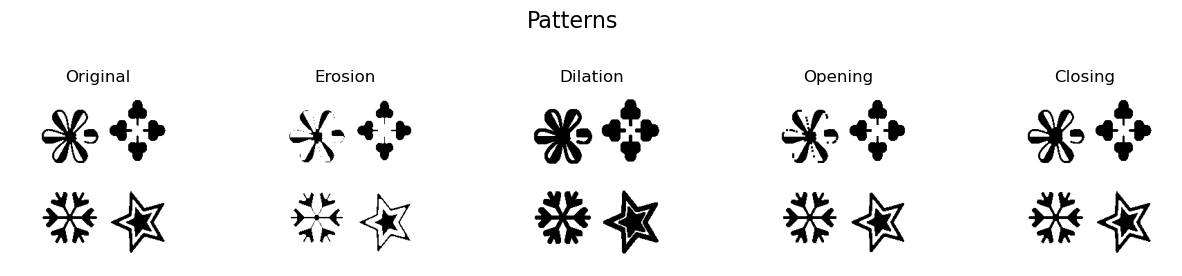

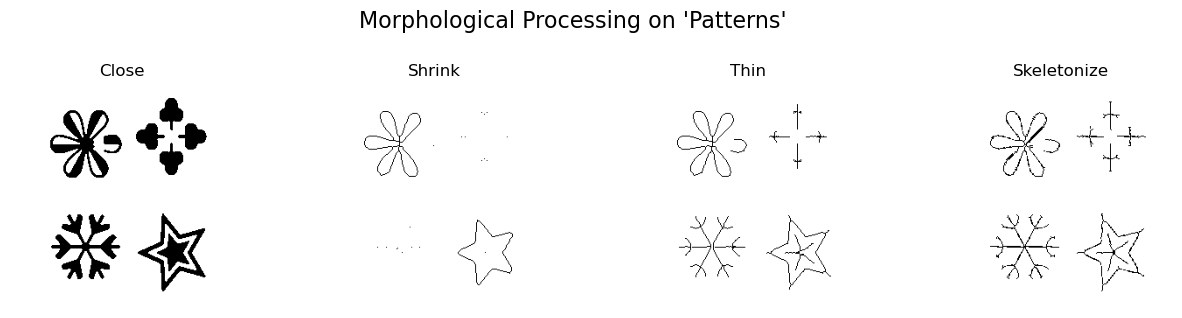

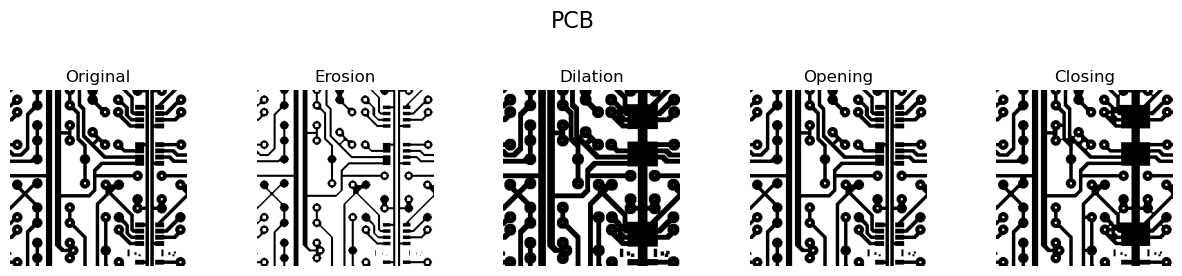

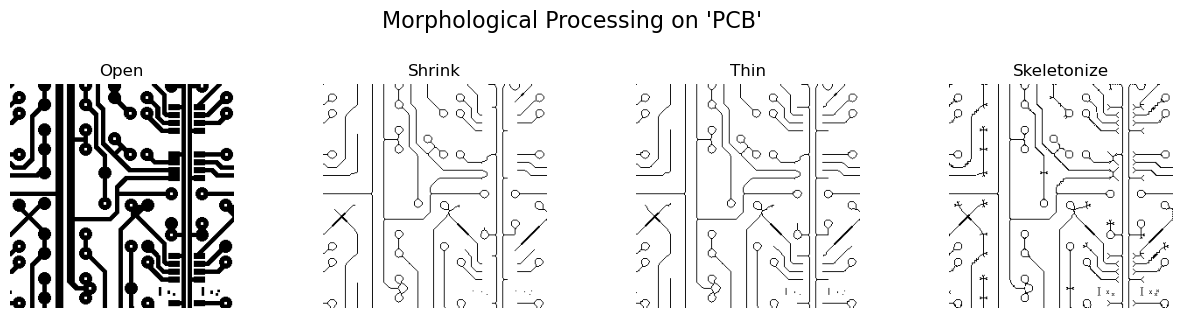

In [5]:
# Morphological Processing

# Patterns
patterns = Image(256, 256, 1)
patterns.load("images/HW2/patterns.raw")
patterns = Image.median_denoise(patterns, 0, 3)

patterns_erosion = Image.negative(Image.erode(Image.negative(patterns), 0, 1))
patterns_dilation = Image.negative(Image.dilate(Image.negative(patterns), 0, 1))
patterns_open = Image.negative(Image.open(Image.negative(patterns), 0))
patterns_close = Image.negative(Image.close(Image.negative(patterns), 0))

show_images([patterns, patterns_erosion, patterns_dilation, patterns_open, patterns_close], ["Original", "Erosion", "Dilation", "Opening", "Closing"], "Patterns")

patterns_shrink = Image.negative(Image.shrink(Image.negative(patterns), 0, 40))
patterns_thin = Image.negative(Image.thin(Image.negative(patterns), 0, 12))
patterns_skeletonize = Image.negative(Image.skeletonize(Image.negative(patterns), 0, 8))

show_images([patterns, patterns_shrink, patterns_thin, patterns_skeletonize], ["Close", "Shrink", "Thin", "Skeletonize"], "Morphological Processing on 'Patterns'")

# PCB
pcb = Image(256, 256, 1)
pcb.load("images/HW2/pcb.raw")
pcb = Image.negative(Image.open(Image.negative(pcb), 0), 0)

pcb_erosion = Image.negative(Image.erode(Image.negative(pcb), 0, 1))
pcb_dilation = Image.negative(Image.dilate(Image.negative(pcb), 0, 1))
pcb_open = Image.negative(Image.open(Image.negative(pcb), 0))
pcb_close = Image.negative(Image.close(Image.negative(pcb), 0))

show_images([pcb, pcb_erosion, pcb_dilation, pcb_open, pcb_close], ["Original", "Erosion", "Dilation", "Opening", "Closing"], "PCB")

pcb_shrink = Image.negative(Image.shrink(Image.negative(pcb_open), 0, 12))
pcb_thin = Image.negative(Image.thin(Image.negative(pcb_open), 0, 12))
pcb_skeletonize = Image.negative(Image.skeletonize(Image.negative(pcb_open), 0, 12))

show_images([pcb, pcb_shrink, pcb_thin, pcb_skeletonize], ["Open", "Shrink", "Thin", "Skeletonize"], "Morphological Processing on 'PCB'")

#### **[Problem 3: Digital Halftoning]**

In daily life, we often need to print images. Sometimes, we may only have black ink, and in such cases, we can only print grayscale images. In more extreme cases, when we can only print pure black and white, how can we print a grayscale image? This is where **digital halftoning** comes in, converting grayscale into the density of black pixels, which tricks our brain into perceiving shades of gray.

I implemented four methods for this:

### 1. Fixed Threshold Dithering
This method is very simple and intuitive. A threshold is provided, and if the pixel’s grayscale value is greater than this threshold, it is set to white; otherwise, it is set to black. However, due to the simplicity of this method, the result is not very good.

### 2. Random Dithering
As the name suggests, in this method, each pixel generates a random grayscale value. If the pixel’s grayscale value is greater than the randomly generated grayscale value, it is set to white; otherwise, it is set to black. I believe this method works better than fixed threshold dithering, as the random effect makes our brains ignore some of the finer details.

For the implementation, I used two approaches:
- The first approach uses the built-in C++ random number generator with a seed to produce random numbers.
- The second approach uses a custom hash algorithm. By providing a seed and using a large prime number, I incorporate the pixel’s grayscale value and coordinates, compute the remainder with the large prime number, and then clamp the result between 0 and 255. This generates a more evenly distributed hash.

The comparison of the effects of the two random algorithms is shown below.

### 3. Dithering Matrix
This method mainly uses Bayer’s index algorithm for ordered dithering. By using a fixed Bayer index matrix, we dynamically generate a corresponding threshold matrix and then perform black-and-white determination based on the matrix's thresholds. This method produces better results than the first two.

I also provide an interface to automatically generate Bayer matrices of different sizes, and the dithering effect will vary accordingly. Additionally, I considered the display situation: typically, we don't have extreme cases where only pure black and white are possible. So, I introduced an input called `numOfLevels`, which allows you to specify the number of grayscale levels your printer can provide. The generated image will then contain only these grayscale levels.

The process works by setting grayscale levels with `numOfLevels`. For each pixel, the threshold is calculated using `bayer_threshold * (255 / numOfLevels)`. Then, by comparing `pixel[i][j] - level[k]` with the threshold, if the difference is greater than the threshold, the pixel becomes `level[k + 1]`; otherwise, it remains at `level[k]`. The implementation details can be found in `process.cpp`.

### 4. Floyd-Steinberg Error Diffusion Dithering (FSEDD)
This is the method I believe has the best result, although it is also the most complex. The main approach is to declare a dithering method (I provide fixed and Bayer options), then calculate the pixel's error and diffuse this error to subsequent pixels in order to reduce the visual discomfort caused by the error.

To address some odd effects or bugs, I provide an option to choose the pixel traversal method. You can choose between **serpentine scanning** or **standard scanning**, which results in different effects, as shown below.

### Conclusion
In summary, after using these different methods, I believe that the **Bayer dithering-based FSEDD** method produces the best results. It can recreate most of the grayscale details of an image, even when only pure black and white are available.

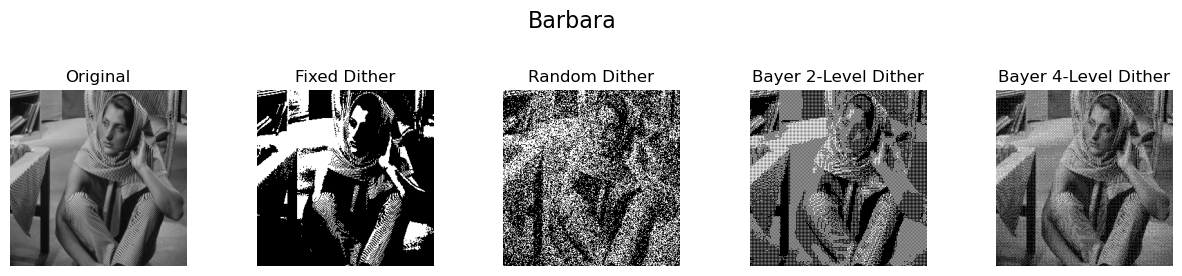

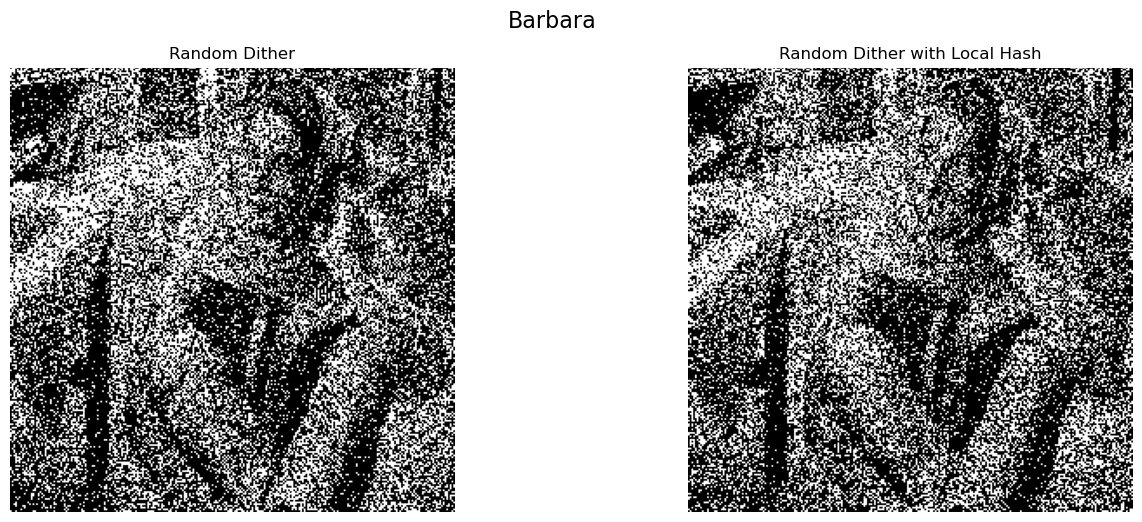

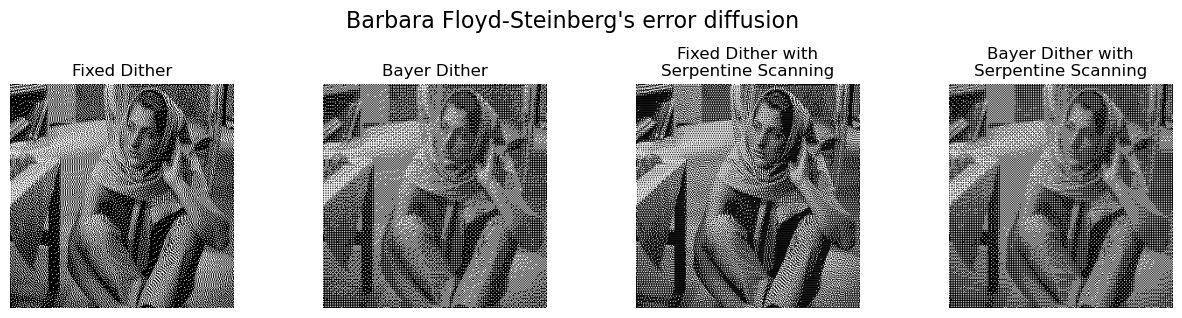

In [6]:
# Digital Halftoning

barbara = Image(256, 256, 1)
barbara.load("images/HW2/barbara.raw")

barbara_fixed = Image.fixed_dither(barbara, 0, 128)
barbara_random = Image.random_dither(barbara, 0, False, 10000)
barbara_random_hash = Image.random_dither(barbara, 0, True, 10000)
barbara_bayer_2_levels = Image.bayer_dither(barbara, 0, 2, 2)
barbara_bayer_4_levels = Image.bayer_dither(barbara, 0, 4, 4)

show_images([barbara, barbara_fixed, barbara_random, barbara_bayer_2_levels, barbara_bayer_4_levels], ["Original", "Fixed Dither", "Random Dither", "Bayer 2-Level Dither", "Bayer 4-Level Dither"], "Barbara")
show_images([barbara_random, barbara_random_hash], ["Random Dither", "Random Dither with Local Hash"], "Barbara")

barbara_bayer_FSDD_Fixed = Image.fsed_dither(barbara, 0, "fixed", 127, False)
barbara_bayer_FSDD_Bayer = Image.fsed_dither(barbara, 0, "bayer", 2, False)
barbara_bayer_FSDD_Fixed_Serpentine = Image.fsed_dither(barbara, 0, "fixed", 127, True)
barbara_bayer_FSDD_Bayer_Serpentine = Image.fsed_dither(barbara, 0, "bayer", 2, True)

show_images([barbara_bayer_FSDD_Fixed, barbara_bayer_FSDD_Bayer, barbara_bayer_FSDD_Fixed_Serpentine, barbara_bayer_FSDD_Bayer_Serpentine], ["Fixed Dither", "Bayer Dither", "Fixed Dither with Serpentine Scanning", "Bayer Dither with Serpentine Scanning"], "Barbara Floyd-Steinberg's error diffusion")